In [ ]:
# # Loop through all the pixels in the image
#     for x in range(image.shape[0]):
#         for y in range(image.shape[1]):
#             for z in range(image.shape[2]):
#                 # Get the pixel value at (x, y, z)
#                 center_pixel = image[x, y, z]

#                 # Initialize the weight sum
#                 weight_sum = 0

#                 # Loop through the local neighborhood
#                 for i in range(-diameter, diameter + 1):
#                     for j in range(-diameter, diameter + 1):
#                         for k in range(-diameter, diameter + 1):
#                             # Get the coordinates of the neighbor
#                             neighbor_x = x + i
#                             neighbor_y = y + j
#                             neighbor_z = z + k

#                             # Make sure the neighbor is inside the image
#                             if 0 <= neighbor_x < image.shape[0] and \
#                                0 <= neighbor_y < image.shape[1] and \
#                                0 <= neighbor_z < image.shape[2]:

#                                 # Get the pixel value of the neighbor
#                                 neighbor_pixel = image[neighbor_x, neighbor_y, neighbor_z]

#                                 # Calculate the spatial distance
#                                 spatial_distance = (i ** 2 + j ** 2 + k ** 2) ** 0.5

#                                 # Calculate the intensity difference
#                                 intensity_distance = abs(center_pixel - neighbor_pixel)

#                                 # Calculate the weight
#                                 weight = np.exp(-((spatial_distance ** 2) / (2 * sigma_spatial ** 2) + (intensity_distance ** 2) / (2 * sigma_intensity ** 2)))

#                                 # Accumulate the filtered value
#                                 filtered_image[x, y, z] += neighbor_pixel * weight

#                                 # Accumulate the weights
#                                 weight_sum += weight

#                 # Divide by the sum of the weights to get the average
#                 filtered_image[x, y, z] /= weight_sum


In [1]:
# # A bilateral filter is a non-linear, edge preserving and noise reducing smoothing filter for images.
# **It replaces the intensity of each pixel with a weighted average of intensity values from nearby pixels.**

# - This weight can be based on a Gaussian distribution.
# - The weight does not only depend on the Euclidean distance of pixels, but also on the radiometric differences e.g color intensity 
# - The Gaussian distribution is used to give more weight to pixels that are closer to the central pixel and also have similar intensity values.

# Therefore, To implement a bilateral filter from scratch that filters a 3D image without having to take individual 2D slices,
# we can use a nested loop to iterate through each pixel in the 3D image,
# and then use the intensity and spatial distance of the pixel to compute the weight of the pixel.

import numpy as np

def bilateral_filter_3d(image, diameter, sigma_intensity, sigma_spatial):
    """Apply a bilateral filter to an image.
    Parameters
    ----------
    image : ndarray
        Input image.
    diameter : int
        Diameter of each pixel neighborhood that is used during filtering.
    sigma_intensity : float
        Filter sigma in the color/intensity range space.
    sigma_spatial : float
        Filter sigma in the coordinate space.
    Returns
    -------
    filtered_image : ndarray
        Filtered output image.
    """
    # Create an empty image to store the output
    filtered_image = np.zeros_like(image)
    
    # Loop through all the pixels in the image
    for x in range(image.shape[0]):
        for y in range(image.shape[1]):
            for z in range(image.shape[2]):
                # Get the pixel value at (x, y, z)
                center_pixel = image[x, y, z]

                # Initialize the weight sum
                neighborhood_sum = 0
                neighborhood_weight_sum = 0
                weight_sum = 0
                
                # Loop through the local neighborhood
                for x_n in range(x-diameter, x+diameter + 1):
                    for y_n in range(y-diameter, y+diameter + 1):
                        for z_n in range(z-diameter, z+diameter + 1):
                            # Get the coordinates of the neighbour
                            neighbor_x = x_n
                            neighbor_y = y_n
                            neighbor_z = z_n

                            # Make sure the neighbor is inside the image
                            if 0 <= neighbor_x < image.shape[0] and \
                                0 <= neighbor_y < image.shape[1] and \
                                0 <= neighbor_z < image.shape[2]:

                                # Get the pixel value of the neighbor
                                neighbor_pixel = image[neighbor_x, neighbor_y, neighbor_z]

                                # Calculate the spatial distance
                                spatial_distance = ((x-x_n) ** 2 + (y-y_n) ** 2 + (z-z_n) ** 2) ** 0.5
                                
                                # Calculate the intensity difference
                                intensity_distance = (center_pixel - neighbor_pixel)

                                # Calculate the intensity weight i.e the weight of the pixel based on the intensity difference
                                intensity_weight = (1.0/(2*np.pi*(sigma_intensity**2)))*np.exp(-(intensity_distance**2) / (2*sigma_intensity**2))

                                # Calculate the spatial weight i.e the weight of the pixel based on the spatial distance from the center pixel
                                spatial_weight = (1.0/(2*np.pi*(sigma_spatial**2)))*np.exp(-(spatial_distance**2) / (2*sigma_spatial**2))

                                # Calculate the overall weight by multiplying: spatial weight * intensity weight
                                # Compute the overall weight
                                weight = spatial_weight * intensity_weight

                                # Accumulate the weights 
                                weight_sum += weight

                                # Accumulate the weighted neighborhood sum ie the weighted sum of all the pixels in the neighborhood
                                neighborhood_sum += weight * image[x_n, y_n, z_n]

                                # Accumulate the neighborhood weight sum ie the sum of all the weights
                                neighborhood_weight_sum += weight
        
                # Compute the filtered pixel value
                filtered_image[x, y, z] = neighborhood_sum / neighborhood_weight_sum
    # Return the filtered image
    return filtered_image
    

In [2]:
# # A bilateral filter is a non-linear, edge preserving and noise reducing smoothing filter for images.
# **It replaces the intensity of each pixel with a weighted average of intensity values from nearby pixels.**

# - This weight can be based on a Gaussian distribution.
# - The weight does not only depend on the Euclidean distance of pixels, but also on the radiometric differences e.g color intensity 
# - The Gaussian distribution is used to give more weight to pixels that are closer to the central pixel and also have similar intensity values.

# Therefore, To implement a bilateral filter from scratch that filters a 3D image without having to take individual 2D slices,
# we can use a nested loop to iterate through each pixel in the 3D image,
# and then use the intensity and spatial distance of the pixel to compute the weight of the pixel.

import numpy as np
# Modify code for 2D image
def bilateral_filter_2d(image, diameter, sigma_intensity, sigma_spatial):
    """Apply a bilateral filter to an image.
    Parameters
    ----------
    image : ndarray
        Input image.
    diameter : int
        Diameter of each pixel neighborhood that is used during filtering.
    sigma_intensity : float
        Filter sigma in the color/intensity range space.
    sigma_spatial : float
        Filter sigma in the coordinate space.
    Returns
    -------
    filtered_image : ndarray
        Filtered output image.
    """
    # Create an empty image to store the output
    filtered_image = np.zeros_like(image)
    
    # Loop through all the pixels in the image
    for x in range(image.shape[0]):
        for y in range(image.shape[1]):
        #for z in range(image.shape[2]):
            # Get the pixel value at (x, y, z)
            center_pixel = image[x, y]

            # Initialize the weight sum
            neighborhood_sum = 0
            neighborhood_weight_sum = 0
            weight_sum = 0
            
            # Loop through the local neighborhood
            for x_n in range(x-diameter, x+diameter + 1):
                for y_n in range(y-diameter, y+diameter + 1):
                    #for z_n in range(-diameter, diameter + 1):
                    # Get the coordinates of the neighbour
                    neighbor_x = x_n
                    neighbor_y = y_n
                    #neighbor_z = z + z_n

                    # Make sure the neighbor is inside the image
                    if 0 <= neighbor_x < image.shape[0] and 0 <= neighbor_y < image.shape[1]:

                        # Get the pixel value of the neighbor
                        neighbor_pixel = image[neighbor_x, neighbor_y]

                        # Calculate the spatial distance
                        spatial_distance = ((x-x_n) ** 2 + (y-y_n) ** 2) ** 0.5
                        
                        # Calculate the intensity difference
                        intensity_distance = (center_pixel - neighbor_pixel)

                        # Calculate the intensity weight i.e the weight of the pixel based on the intensity difference
                        intensity_weight = (1.0/(2*np.pi*(sigma_intensity**2)))*np.exp(-(intensity_distance**2) / (2*sigma_intensity**2))

                        # Calculate the spatial weight i.e the weight of the pixel based on the spatial distance from the center pixel
                        spatial_weight = (1.0/(2*np.pi*(sigma_spatial**2)))*np.exp(-(spatial_distance**2) / (2*sigma_spatial**2))

                        # Calculate the overall weight by multiplying: spatial weight * intensity weight
                        # Compute the overall weight
                        weight = spatial_weight * intensity_weight

                        # Accumulate the weights 
                        weight_sum += weight

                        # Accumulate the weighted neighborhood sum ie the weighted sum of all the pixels in the neighborhood
                        neighborhood_sum += weight * image[x_n, y_n]

                        # Accumulate the neighborhood weight sum ie the sum of all the weights
                        neighborhood_weight_sum += weight
        
            # Compute the filtered pixel value
            filtered_image[x, y] = neighborhood_sum / neighborhood_weight_sum

    return filtered_image

Image shape: (455, 325, 46)


/tmp/ipykernel_19657/87517354.py:65: RuntimeWarning: overflow encountered in ubyte_scalars
  intensity_distance = (center_pixel - neighbor_pixel)


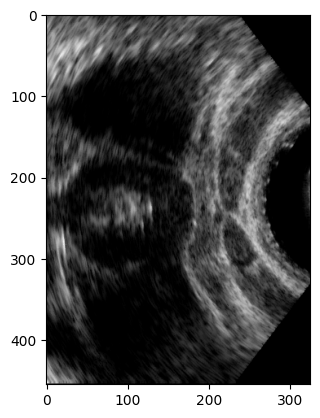

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Load image
image = np.load("test_trus.npy").T
print("Image shape:", image.shape)

# Apply bilateral filter to image using OpenCV
d = 3
sigmaColor = 40
sigmaSpace = 10
# Apply bilateral filter to image using bilateral_filter_2d
filtered_image_2d = bilateral_filter_2d(image[:, :, 0], d, sigmaColor, sigmaSpace)
plt.imshow(filtered_image_2d, cmap='gray')


In [11]:
filtered_image_2d.shape

(455, 325)

In [ ]:
# Apply bilateral filter to image using bilateral_filter_3d
filtered_image_3d = bilateral_filter_3d(image[:, :, :2], d, sigmaColor, sigmaSpace)
plt.imshow(filtered_image_3d[:, :, 0], cmap='gray')


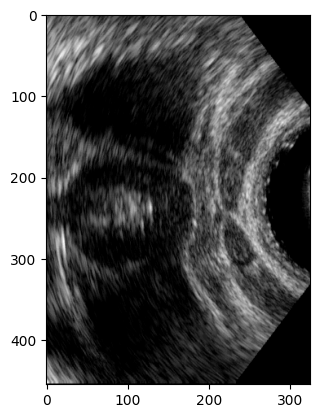

In [17]:
plt.imshow(filtered_image_3d[:, :, 0], cmap='gray')

In [ ]:
fil

/tmp/ipykernel_19657/87517354.py:65: RuntimeWarning: overflow encountered in ubyte_scalars
  intensity_distance = (center_pixel - neighbor_pixel)
/tmp/ipykernel_19657/2958091240.py:67: RuntimeWarning: overflow encountered in ubyte_scalars
  intensity_distance = (center_pixel - neighbor_pixel)


Text(0.5, 1.0, '3d')

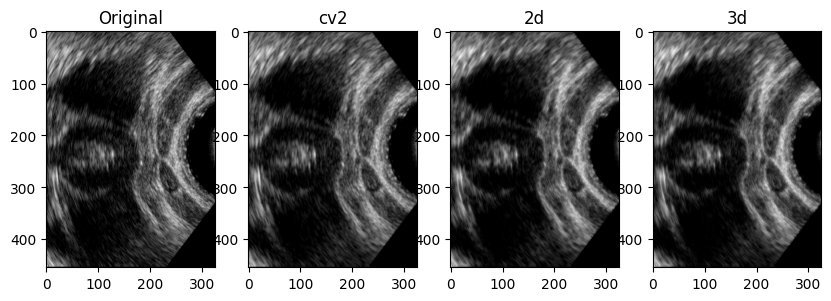

In [10]:
import cv2
import numpy as np

# Apply bilateral filter to image using OpenCV
d = 3
sigmaColor = 75
sigmaSpace = 5
filtered_image = cv2.bilateralFilter(image[:, :, 0], d, sigmaColor, sigmaSpace)

# Apply bilateral filter to image using bilateral_filter_2d
filtered_image_2d = bilateral_filter_2d(image[:, :, 0], d, sigmaColor, sigmaSpace)

# Apply bilateral filter to image using bilateral_filter_3d
filtered_image_3d = bilateral_filter_3d(image[:, :, :2], d, sigmaColor, sigmaSpace)


import matplotlib.pyplot as plt
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(10, 5))
ax1.imshow(image[:,:,1], cmap='gray')
ax1.set_title('Original')
ax2.imshow(filtered_image, cmap='gray')
ax2.set_title('cv2')
ax3.imshow(filtered_image_2d, cmap='gray')
ax3.set_title('2d')
ax4.imshow(filtered_image_3d[:,:,0], cmap='gray')
ax4.set_title('3d')

In [5]:
image[:, :, :1].shape

(455, 325, 1)

In [34]:
import numpy as np
from scipy.ndimage.filters import gaussian_filter

def bilateral_filter_2d(img, d, sigmaColor, sigmaSpace):
    filtered_img = np.zeros_like(img)
    for x in range(img.shape[0]):
        for y in range(img.shape[1]):
            #for x in range(img.shape[2]):
                # Compute the Gaussian spatial weight
            #spatial_weight = np.exp(-(x**2 + y**2) / (2*sigmaSpace**2))
            
            # Iterate through the neighborhood
            neighborhood_sum = 0
            neighborhood_weight_sum = 0
            for x_n in range(x-d, x+d+1):
                for y_n in range(y-d, y+d+1):
                    #for x_n in range(x-d, x+d+1):
                    # Check if the neighborhood pixel is within the image bounds
                    if ((0 <= x_n < img.shape[0]) and (0 <= y_n < img.shape[1])):
                        # Compute the Gaussian intensity weight
                        intensity_weight = (1.0/(2*np.pi*(sigmaColor**2)))*np.exp(-(img[x_n, y_n] - img[x, y])**2 / (2*sigmaColor**2))
                        spatial_weight = (1.0/(2*np.pi*(sigmaSpace**2)))*np.exp(-(np.sqrt((x - x_n) ** 2 + (y - y_n) ** 2))**2 / (2*sigmaSpace**2))
                        
                        # Compute the overall weight
                        weight = spatial_weight * intensity_weight
                        
                        #Accumulate the weighted neighborhood sum
                        neighborhood_sum += weight * img[x_n, y_n]
                        neighborhood_weight_sum += weight
        
            # Compute the filtered pixel value
            filtered_img[x, y] = neighborhood_sum / neighborhood_weight_sum

    return filtered_img


/tmp/ipykernel_907/513580587.py:2: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter


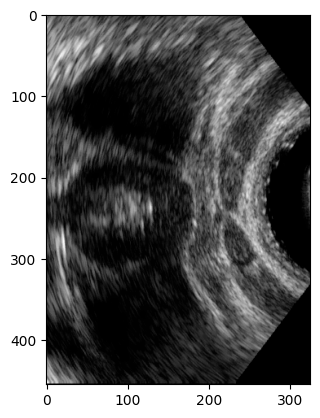

In [18]:
import cv2
import numpy as np

# Apply bilateral filter to image using OpenCV
d = 30
sigmaColor = 5
sigmaSpace = 5
filtered_image = cv2.bilateralFilter(image[:, :, 0], d, sigmaColor, sigmaSpace)
plt.imshow(filtered_image, cmap='gray')

## 2D filtering after re-slicing

### Apply re-slicing

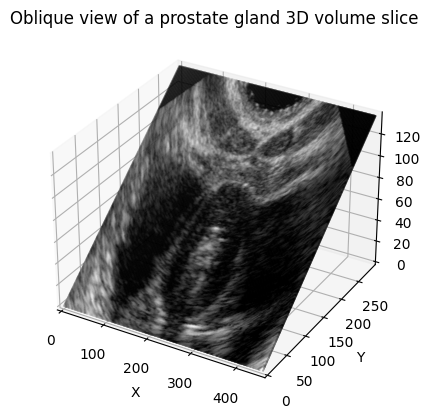

In [22]:
import numpy as np
import matplotlib.pyplot as plt
image = np.load("test_trus.npy").T

# Import interpn
from scipy.interpolate import interpn

# Apply rotation at the centre of the slice
translation_points = (np.array(image[:, :, 0].shape) - 1)/2
rotation_angle = 45

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load the 3D volume of the prostate glandprostate_volume = np.load("prostate_volume.npy")
# Load the 3D volume of the prostate gland
prostate_volume = image

# Create a figure and a 3D axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Set the x, y, and z limits of the plot
x_len, y_len, z_len = prostate_volume.shape
ax.set_xlim(0, x_len)
ax.set_ylim(0, y_len)
ax.set_zlim(0, z_len)

# Define the transformation matrix for the oblique view
theta = np.deg2rad(0)
phi = np.deg2rad(-25)
slice_index = 0
# translation_matrix = np.array([[1, 0, -translation_points[0]],
#                                    [0, 1, -translation_points[1]],
#                                    [0, 0, 1]])
# rotation_matrix_theta = np.array([[np.cos(theta), -np.sin(theta), 0],
#                             [np.sin(theta), np.cos(theta), 0],
#                             [0, 0, 1]])
# rotation_matrix_phi = np.array([[1, 0, 0],
#                                    [0, np.cos(phi), -np.sin(phi)],
#                                    [0, np.sin(phi), np.cos(phi)]])
# # Then apply translation back to the original position
# translation_back_matrix = np.array([[1, 0, translation_points[0]],
#                                     [0, 1, translation_points[1]],
#                                     [0, 0, 1]])
# # Create a composed affine matrix
# rotation_matrix = np.matmul(translation_back_matrix, np.matmul(rotation_matrix_phi, np.matmul(rotation_matrix_theta, translation_matrix)))


rotation_matrix_theta = np.array([[np.cos(theta), -np.sin(theta), 0],
                            [np.sin(theta), np.cos(theta), 0],
                            [0, 0, 1]])
rotation_matrix_phi = np.array([[1, 0, 0],
                                   [0, np.cos(phi), -np.sin(phi)],
                                   [0, np.sin(phi), np.cos(phi)]])

# Create a composed affine matrix
rotation_matrix = np.matmul(rotation_matrix_phi, rotation_matrix_theta)


# Define the coordinates of the slice

xx, yy = np.meshgrid(np.arange(x_len), np.arange(y_len), indexing='ij')
zz = np.ones_like(xx) * slice_index


# Apply the transformation matrix to the coordinates
xyz = np.vstack((xx.flatten(), yy.flatten(), zz.flatten())).T
xyz = np.dot(xyz, rotation_matrix)

# Reshape the transformed coordinates and the slice values
xx, yy, zz = xyz[:, 0].reshape(xx.shape), xyz[:, 1].reshape(yy.shape), xyz[:, 2].reshape(zz.shape)



# Extract the slice values
slice_values = prostate_volume[:, :, slice_index]


# Interpolate the slice values to the transformed coordinates
slice_values = interpn((np.arange(x_len), np.arange(y_len)), slice_values, np.vstack((xx.flatten(), yy.flatten())).T, method='nearest', bounds_error=False, fill_value=None)

# Plot the transformed slice as a surface

# Create a 1D array of the slice values
color_values = slice_values.flatten()

# Create a 1D array of RGB colors corresponding to the intensity values
cmap = plt.cm.gray
norm = plt.Normalize(vmin=color_values.min(), vmax=color_values.max())
color_array = cmap(norm(color_values))

# Plot the transformed slice as a 3D scatter plot
ax.scatter(xx, yy, zz, c=color_array, s = 0.07)

# Calculate the minimum and maximum z-coordinates of the transformed slice
z_min = zz.min()
z_max = zz.max()
x_min = xx.min()
x_max = xx.max()
y_min = yy.min()
y_max = yy.max()

# Set the limits of the z-axis to include the entire slice
ax.set_zlim(z_min, z_max)
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)

# Set the title of the plot
ax.set_title("Oblique view of a prostate gland 3D volume slice")

# Set the labels for the x, y, and z axes
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

# Show the plot
plt.show()


In [23]:
re_sliced_image = slice_values.reshape(xx.shape)
re_sliced_image.shape
import numpy as np
import matplotlib.pyplot as plt


# Load image
image = np.load("test_trus.npy").T
print("Image shape:", image.shape)
print("re_sliced_image:", re_sliced_image.shape)

Image shape: (455, 325, 46)
re_sliced_image: (455, 325)


### Apply 2D filtering after re-slicing

1. What is the effect of increasing sigmaColor in bilateral filters?5, 20, 80
1. What is the effect of increasing sigmaSpace in bilateral filters?5, 20, 80

In [24]:

# Apply bilateral filter to image using OpenCV
d = 3
sigmaColor = 5
sigmaSpace = 80
# Apply bilateral filter to image using bilateral_filter_2d
filtered_image_2d = bilateral_filter_2d(re_sliced_image, d, sigmaColor, sigmaSpace)
#plt.imshow(filtered_image_2d, cmap='gray')

# # Create a 1D array of the slice values
# # Fill in the blanks with 0s
# xx2d = xx
# yy2d = yy
# plt.scatter(xx2d, yy2d, c=color_array, s = 0.07)
# # Add title
# plt.title("2D filtering | d = 3, sigmaColor = 120, sigmaSpace = 5")
# # Save the figure
# plt.savefig("2d_filtering_sigmaColor_120.png")


In [ ]:
# # Create function that applies filter to image then saves the plot
# def plot_filtered_image(image, d, sigmaColor, sigmaSpace):
#     # Apply bilateral filter to image using bilateral_filter_2d
#     filtered_image_2d = bilateral_filter_2d(image, d, sigmaColor, sigmaSpace)
#     # Create a 1D array of the slice values
#     color_values = filtered_image_2d.flatten()
#     # Create a 1D array of RGB colors corresponding to the intensity values
#     cmap = plt.cm.gray
#     norm = plt.Normalize(vmin=color_values.min(), vmax=color_values.max())
#     color_array = cmap(norm(color_values))
#     # Create a 2D array of the x and y coordinates
#     xx2d, yy2d = np.meshgrid(np.arange(image.shape[0]), np.arange(image.shape[1]), indexing='ij')
#     # Plot the filtered image as a 3D scatter plot
#     plt.scatter(xx2d, yy2d, c=color_array, s = 0.07)
#     # Add title
#     plt.title("2D filtering | d = {}, sigmaColor = {}, sigmaSpace = {}".format(d, sigmaColor, sigmaSpace))
#     # Save the figure
#     plt.savefig("2d_filtering_d_{}_sigmaColor_{}_sigmaSpace_{}.png".format(d, sigmaColor, sigmaSpace))
#     # Clear the plot
#     plt.clf()

### Difference between the re-sliced then filtered image and the original image

In [25]:
import numpy as np
from skimage.metrics import structural_similarity as ssim

# Assuming "original_slice" and "oblique_slice" are two 2D arrays of the same shape
# representing the intensity values of the two slices


# Assuming "original_slice" and "resampled_slice" are two 2D arrays of the same shape
# representing the intensity values of the two slices

# Compute the MSE between the two slices
original_slice = image[:, :, slice_index]
mse = np.mean((original_slice - filtered_image_2d) ** 2)

print(f"MSE: {mse}")

# Compute the SSIM between the two slices
ssim_value = ssim(original_slice, filtered_image_2d, gaussian_weights=False, channel_axis=None)

print(f"SSIM: {ssim_value}")

# Compute NCC between the two slices
re_sliced_image = filtered_image_2d
mu_original = np.mean(original_slice)
mu_re_sliced = np.mean(re_sliced_image)
sigma_original = np.std(original_slice)
sigma_re_sliced = np.std(re_sliced_image)

# Compute the normalized cross-correlation between the two slices
ncc = np.mean((original_slice - mu_original) * (re_sliced_image - mu_re_sliced)) / (sigma_original * sigma_re_sliced)

print("Normalized Cross Correlation:", ncc)

# Compute the peak signal-to-noise ratio
max_pixel = np.iinfo(original_slice.dtype).max

# Compute the peak signal-to-noise ratio
psnr = 20 * np.log10(max_pixel / np.sqrt(mse))

print(f"PSNR: {psnr}")

# Compute the dice coefficient between the two slices
# Compute the intersection and union of the two images
intersection = np.logical_and(original_slice, re_sliced_image)
union = np.logical_or(original_slice, re_sliced_image)

# Compute the Dice coefficient
dice = 2 * intersection.sum() / union.sum()

print("Dice Coefficient:", dice)


MSE: 1283.4920609129483
SSIM: 0.2346936867050364
Normalized Cross Correlation: 0.5536914806666804
PSNR: 17.046871741965305
Dice Coefficient: 1.6025183275938564


## Apply 3D filtering before re-slicing

## 3D filtering

1. What is the effect of increasing sigmaColor in bilateral filters?5, 20, 80
1. What is the effect of increasing sigmaSpace in bilateral filters?5, 20, 80

In [19]:
# Apply bilateral filter to image using bilateral_filter_3d
import numpy as np
import matplotlib.pyplot as plt

# Load image
image = np.load("test_trus.npy").T
print("Image shape:", image.shape)

# Apply bilateral filter to image using OpenCV
d = 3
sigmaColor = 240
sigmaSpace = 5
filtered_image_3d = bilateral_filter_3d(image[:, :, :3], d, sigmaColor, sigmaSpace)
#plt.imshow(filtered_image_3d[:, :, 0], cmap='gray')


Image shape: (455, 325, 46)


/tmp/ipykernel_5914/2958091240.py:67: RuntimeWarning: overflow encountered in ubyte_scalars
  intensity_distance = (center_pixel - neighbor_pixel)


### Apply reslicing after 3D filtering

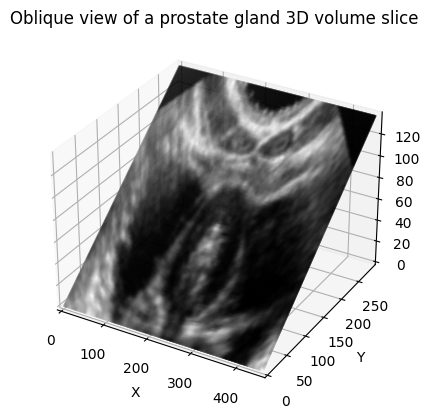

In [20]:
# Apply rotation at the centre of the slice
translation_points = (np.array(image[:, :, 0].shape) - 1)/2
rotation_angle = 45

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# Import interpn
from scipy.interpolate import interpn

# Load the 3D volume of the prostate glandprostate_volume = np.load("prostate_volume.npy")
# Load the 3D volume of the prostate gland
prostate_volume = filtered_image_3d

# Create a figure and a 3D axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Set the x, y, and z limits of the plot
x_len, y_len, z_len = prostate_volume.shape
ax.set_xlim(0, x_len)
ax.set_ylim(0, y_len)
ax.set_zlim(0, z_len)

# Define the transformation matrix for the oblique view
theta = np.deg2rad(0)
phi = np.deg2rad(-25)
slice_index = 0
# translation_matrix = np.array([[1, 0, -translation_points[0]],
#                                    [0, 1, -translation_points[1]],
#                                    [0, 0, 1]])
# rotation_matrix_theta = np.array([[np.cos(theta), -np.sin(theta), 0],
#                             [np.sin(theta), np.cos(theta), 0],
#                             [0, 0, 1]])
# rotation_matrix_phi = np.array([[1, 0, 0],
#                                    [0, np.cos(phi), -np.sin(phi)],
#                                    [0, np.sin(phi), np.cos(phi)]])
# # Then apply translation back to the original position
# translation_back_matrix = np.array([[1, 0, translation_points[0]],
#                                     [0, 1, translation_points[1]],
#                                     [0, 0, 1]])
# # Create a composed affine matrix
# rotation_matrix = np.matmul(translation_back_matrix, np.matmul(rotation_matrix_phi, np.matmul(rotation_matrix_theta, translation_matrix)))


rotation_matrix_theta = np.array([[np.cos(theta), -np.sin(theta), 0],
                            [np.sin(theta), np.cos(theta), 0],
                            [0, 0, 1]])
rotation_matrix_phi = np.array([[1, 0, 0],
                                   [0, np.cos(phi), -np.sin(phi)],
                                   [0, np.sin(phi), np.cos(phi)]])

# Create a composed affine matrix
rotation_matrix = np.matmul(rotation_matrix_phi, rotation_matrix_theta)


# Define the coordinates of the slice

xx, yy = np.meshgrid(np.arange(x_len), np.arange(y_len), indexing='ij')
zz = np.ones_like(xx) * slice_index


# Apply the transformation matrix to the coordinates
xyz = np.vstack((xx.flatten(), yy.flatten(), zz.flatten())).T
xyz = np.dot(xyz, rotation_matrix)

# Reshape the transformed coordinates and the slice values
xx, yy, zz = xyz[:, 0].reshape(xx.shape), xyz[:, 1].reshape(yy.shape), xyz[:, 2].reshape(zz.shape)



# Extract the slice values
slice_values = prostate_volume[:, :, slice_index]


# Interpolate the slice values to the transformed coordinates
slice_values = interpn((np.arange(x_len), np.arange(y_len)), slice_values, np.vstack((xx.flatten(), yy.flatten())).T, method='nearest', bounds_error=False, fill_value=None)

# Plot the transformed slice as a surface

# Create a 1D array of the slice values
color_values = slice_values.flatten()

# Create a 1D array of RGB colors corresponding to the intensity values
cmap = plt.cm.gray
norm = plt.Normalize(vmin=color_values.min(), vmax=color_values.max())
color_array = cmap(norm(color_values))

# Plot the transformed slice as a 3D scatter plot
ax.scatter(xx, yy, zz, c=color_array, s = 0.07)

# Calculate the minimum and maximum z-coordinates of the transformed slice
z_min = zz.min()
z_max = zz.max()
x_min = xx.min()
x_max = xx.max()
y_min = yy.min()
y_max = yy.max()

# Set the limits of the z-axis to include the entire slice
ax.set_zlim(z_min, z_max)
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)

# Set the title of the plot
ax.set_title("Oblique view of a prostate gland 3D volume slice")

# Set the labels for the x, y, and z axes
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

# Show the plot
plt.show()


1. What is the effect of increasing sigmaColor in bilateral filters?5, 20, 80
1. What is the effect of increasing sigmaSpace in bilateral filters?5, 20, 80

In [ ]:

# # Create a 1D array of the slice values
# # Fill in the blanks with 0s
# xx3d = xx
# yy3d = yy
# plt.scatter(xx3d, yy3d, c=color_array, s = 0.07)
# # Add title
# plt.title("3D filtering | d = 3, sigmaColor = 5, sigmaSpace = 120")
# # Save the figure
# plt.savefig("3d_filtering_sigmaSpace_120.png")


### Difference between the filtered then re-sliced image and the original image

In [21]:
import numpy as np
from skimage.metrics import structural_similarity as ssim
re_sliced_image = slice_values.reshape(xx.shape)
re_sliced_image.shape
# Assuming "original_slice" and "oblique_slice" are two 2D arrays of the same shape
# representing the intensity values of the two slices


# Assuming "original_slice" and "resampled_slice" are two 2D arrays of the same shape
# representing the intensity values of the two slices

# Compute the MSE between the two slices
original_slice = image[:, :, slice_index]
mse = np.mean((original_slice - re_sliced_image) ** 2)

print(f"MSE: {mse}")

# Compute the SSIM between the two slices
ssim_value = ssim(original_slice, re_sliced_image, gaussian_weights=False, channel_axis=None)

print(f"SSIM: {ssim_value}")

# Compute NCC between the two slices
mu_original = np.mean(original_slice)
mu_re_sliced = np.mean(re_sliced_image)
sigma_original = np.std(original_slice)
sigma_re_sliced = np.std(re_sliced_image)

# Compute the normalized cross-correlation between the two slices
ncc = np.mean((original_slice - mu_original) * (re_sliced_image - mu_re_sliced)) / (sigma_original * sigma_re_sliced)

print("Normalized Cross Correlation:", ncc)

# Compute the PSNR between the two slices
# Compute the maximum pixel value of the images
max_pixel = np.iinfo(original_slice.dtype).max

# Compute the peak signal-to-noise ratio
psnr = 20 * np.log10(max_pixel / np.sqrt(mse))

print(f"PSNR: {psnr}")

# Compute the dice coefficient between the two slices
# Compute the intersection and union of the two images
intersection = np.logical_and(original_slice, re_sliced_image)
union = np.logical_or(original_slice, re_sliced_image)

# Compute the Dice coefficient
dice = 2 * intersection.sum() / union.sum()

print("Dice Coefficient:", dice)

MSE: 1083.264899408284
SSIM: 0.3002693387826677
Normalized Cross Correlation: 0.5800623795928862
PSNR: 17.78345689760804
Dice Coefficient: 1.6314714437283022


In [56]:
#compute the PSNR between the two slices
10 * np.log10((255**2)/1284.09)

17.04484896999888

In [47]:
import numpy as np

# Define the original image and the oblique slice
original_image = np.random.rand(256, 256)
oblique_slice = np.random.rand(256, 256)

# Compute the mean and standard deviation of each image
mu_original = np.mean(original_image)
sigma_original = np.std(original_image)
mu_oblique = np.mean(oblique_slice)
sigma_oblique = np.std(oblique_slice)

# Compute the normalized cross correlation between the two images
ncc = np.mean((original_image - mu_original) * (oblique_slice - mu_oblique)) / (sigma_original * sigma_oblique)

print("Normalized Cross Correlation:", ncc)


Normalized Cross Correlation: 1.0000000000000002


In [ ]:
import numpy as np

# Define the original image and the oblique slice
original_image = np.random.rand(256, 256)
oblique_slice = np.random.rand(256, 256)

# Compute the maximum pixel value of the images
max_pixel = np.iinfo(original_image.dtype).max

# Compute the mean squared error between the two images
mse = np.mean((original_image - oblique_slice) ** 2)

# Compute the peak signal-to-noise ratio
psnr = 20 * np.log10(max_pixel / np.sqrt(mse))

print("Peak Signal-to-Noise Ratio:", psnr)
